# Feature Selection

Many models do not perform well on high-dimensional data. **The curse of dimensionality**

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

business_df = pd.read_csv("../Data/business_census_merged_dataset.csv")

business_df["Median_Income(dollars)"] = pd.to_numeric(business_df["Median_Income(dollars)"], errors='coerce')
business_df["Mean_Income(dollars)"] = pd.to_numeric(business_df["Mean_Income(dollars)"], errors='coerce')

def changeStatus(status):
    if status == 'AZ':
        return 1
    elif status == 'CA':
        return 2
    elif status == 'DE':
        return 3
    elif status == 'FL':
        return 4
    elif status == 'ID':
        return 5
    elif status == 'IL':
        return 6
    elif status == 'IN':
        return 7
    elif status == 'LA':
        return 8
    elif status == 'NJ':
        return 9
    elif status == 'NV':
        return 10
    elif status == 'PA':
        return 11
    else:
        return 12
# Along with replace() and map(), encode the state column into numbers.
business_df["State"] = business_df["State"].apply(changeStatus)

business_df = business_df.dropna()

In [29]:
X = business_df[['State', 'Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions',
                'Total_Estimate_Married-couple_Family_households',
       'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 'Total_Estimate_Households_per_Zip', 'Mean_Income(dollars)']]

# Filter Features by Variation

In [30]:
sorted(zip(X.var(), X), reverse=True)

[(1352585953.3649375, 'Mean_Income(dollars)'),
 (703715100.7108402, 'Median_Income(dollars)'),
 (31605598.38417582, 'Total_Estimate_Households_per_Zip'),
 (9149254.6685379, 'Total_Estimate_Married-couple_Family_households'),
 (7755298.206537145, 'Total_Estimate_Nonfamily_households'),
 (61728.88635982064, 'Review_Count'),
 (12.360146710273204, 'State'),
 (1.7784539771240322, 'Noise_Level'),
 (0.319753723640199, 'Price_Range'),
 (0.24815332130704973, 'Outdoor_Seating'),
 (0.2325896166033707, 'Reservations'),
 (0.231249216501802, 'WiFi'),
 (0.2293498164619516, 'Restaurants_Delivery'),
 (0.22332769707095712, 'Wheelchair_Accessible'),
 (0.1887322921188333, 'Happy_Hour'),
 (0.1867710396326852, 'Good_For_Kids'),
 (0.15701114125481969, 'Good_For_Groups'),
 (0.08166101891247714, 'Alcohol'),
 (0.05141938197853858, 'Restaurants_TakeOut'),
 (0.05116651520401186, 'Accepts_CreditCards'),
 (0.0008097160940537169, 'Dietary_Restrictions')]

In [31]:
X.var()

State                                              1.236015e+01
Review_Count                                       6.172889e+04
Restaurants_Delivery                               2.293498e-01
Outdoor_Seating                                    2.481533e-01
Accepts_CreditCards                                5.116652e-02
Price_Range                                        3.197537e-01
Alcohol                                            8.166102e-02
Good_For_Kids                                      1.867710e-01
Reservations                                       2.325896e-01
Restaurants_TakeOut                                5.141938e-02
WiFi                                               2.312492e-01
Good_For_Groups                                    1.570111e-01
Wheelchair_Accessible                              2.233277e-01
Happy_Hour                                         1.887323e-01
Noise_Level                                        1.778454e+00
Dietary_Restrictions                    

Restaurant Takeout and Dietary Restrictions

# Filter by Correlation
Checking for multicollinearity

In [33]:
X_y=business_df[['Stars_Rating', 'State', 'Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions',
                'Total_Estimate_Married-couple_Family_households',
       'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 'Total_Estimate_Households_per_Zip', 'Mean_Income(dollars)']]

In [34]:
import seaborn as sb

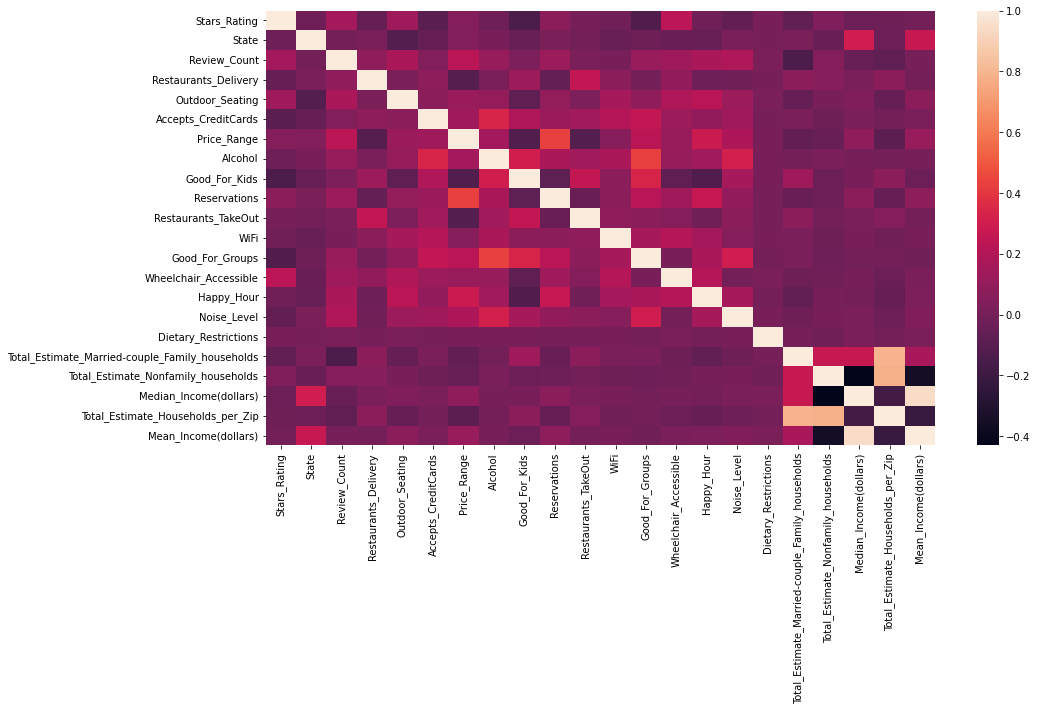

In [35]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.heatmap(X_y.corr(), ax=ax)
plt.show()

In [37]:
sorted(zip(abs(X_y.corr()["Stars_Rating"]), X_y), reverse=True)

[(1.0, 'Stars_Rating'),
 (0.23458775904246612, 'Wheelchair_Accessible'),
 (0.1506495566486373, 'Review_Count'),
 (0.14020638512898323, 'Good_For_Kids'),
 (0.13074126211947998, 'Outdoor_Seating'),
 (0.1288516373559155, 'Good_For_Groups'),
 (0.09388336241925845, 'Accepts_CreditCards'),
 (0.0683887399579842, 'Total_Estimate_Married-couple_Family_households'),
 (0.06719643016611992, 'Reservations'),
 (0.06656585741358609, 'Noise_Level'),
 (0.0512578425298376, 'Restaurants_Delivery'),
 (0.047002944241045626, 'Price_Range'),
 (0.03547494623968672, 'Median_Income(dollars)'),
 (0.0321306994056504, 'Total_Estimate_Households_per_Zip'),
 (0.02888533297740589, 'Total_Estimate_Nonfamily_households'),
 (0.025641596437297746, 'Alcohol'),
 (0.024961915467620208, 'State'),
 (0.01822266758863698, 'WiFi'),
 (0.013969830033746663, 'Happy_Hour'),
 (0.009644612274867641, 'Dietary_Restrictions'),
 (0.005947806839702525, 'Mean_Income(dollars)'),
 (0.004681222875650425, 'Restaurants_TakeOut')]